In [45]:
#Use of Bayes theorem on the naive theorem that the features are independent of each other

#Finding P(Survived // Sex, class, age, etc.)
'''
Three types of Naive Bayes:
-Bernoulli: assumes taht all features are binary such that they take only two values. 0='does not occur' & 1='does_occur'
-Multinomial: discrete data (eg. movie rating 1-5), but for text it shows each frequency
-Gaussian: data is continuous, meaning numbers of great variance (not on terms of occurences or binary)
'''
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import Image

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [5]:
y = df.Survived
inputs = df.drop('Survived', axis=1)
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [7]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [10]:
inputs = pd.concat([df, dummies], axis=1)
inputs.drop(['Sex', 'Survived'], axis=1, inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [12]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [15]:
inputs['Age'] = inputs.Age.fillna(np.mean(inputs.Age))

In [16]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [17]:
inputs

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,False,True
1,1,38.000000,71.2833,True,False
2,3,26.000000,7.9250,True,False
3,1,35.000000,53.1000,True,False
4,3,35.000000,8.0500,False,True
...,...,...,...,...,...
886,2,27.000000,13.0000,False,True
887,1,19.000000,30.0000,True,False
888,3,29.699118,23.4500,True,False
889,1,26.000000,30.0000,False,True


In [19]:
X_train, X_test, y_train, y_test = train_test_split(inputs, y, test_size=0.2)

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [22]:
model.fit(X_train, y_train)

GaussianNB()

In [23]:
model.score(X_test, y_test)

0.7877094972067039

In [24]:
X_test[:10]

,Pclass,Age,Fare,female,male
130,3,33.000000,7.8958,False,True
301,3,29.699118,23.2500,False,True
177,1,50.000000,28.7125,True,False
796,1,49.000000,25.9292,True,False
170,1,61.000000,33.5000,False,True
176,3,29.699118,25.4667,False,True
230,1,35.000000,83.4750,True,False
35,1,42.000000,52.0000,False,True
341,1,24.000000,263.0000,True,False
793,1,29.699118,30.6958,False,True


In [25]:
y_test[:10]

130    0
301    1
177    0
796    1
170    0
176    0
230    1
35     0
341    1
793    0
Name: Survived, dtype: int64

In [26]:
model.predict(X_test[:10])

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [28]:
#notice how the naive bayes is getting some wrong, but that's okay
model.predict_proba(X_test[:10])

array([[9.91156958e-01, 8.84304175e-03],
       [9.90848438e-01, 9.15156153e-03],
       [9.52841202e-03, 9.90471588e-01],
       [9.82609481e-03, 9.90173905e-01],
       [9.14785212e-01, 8.52147881e-02],
       [9.90705727e-01, 9.29427258e-03],
       [1.65610594e-03, 9.98343894e-01],
       [8.91126707e-01, 1.08873293e-01],
       [3.32975943e-13, 1.00000000e+00],
       [9.21377497e-01, 7.86225034e-02]])

In [29]:
#Next, we will try to use text


df2 = pd.read_csv('spam.csv')
df2

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [31]:
df2.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [33]:
df2['spam'] = df2['Category'].apply(lambda x: 1 if x=='spam' else 0)
df2.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [36]:
X_tr, X_te, y_tr, y_te = train_test_split(df2.Message, df2.spam, test_size=0.25)

In [43]:
X_tr.values[:10]

array(['You call him and tell now infront of them. Call him now.',
       'I av a new number,  . Wil u only use this one,ta.',
       "There'll be a minor shindig at my place later tonight, you interested?",
       'Dear, take care. I am just reaching home.love u a lot.',
       'Goodmorning, today i am late for  &lt;DECIMAL&gt; min.',
       "No. She's currently in scotland for that.",
       'Thanks. Fills me with complete calm and reassurance!',
       'S:-)if we have one good partnership going we will take lead:)',
       "I'm turning off my phone. My moms telling everyone I have cancer. And my sister won't stop calling. It hurts to talk. Can't put up with it. See u when u get home. Love u",
       'S but mostly not like that.'], dtype=object)

In [41]:
#CountVectorizer makes a df for all words and their frequencies in each text
v = CountVectorizer()
X_tr_count = v.fit_transform(X_tr.values)
X_tr_count.toarray()[:3] #i can now use this as my input data because it is technically the same as the text

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

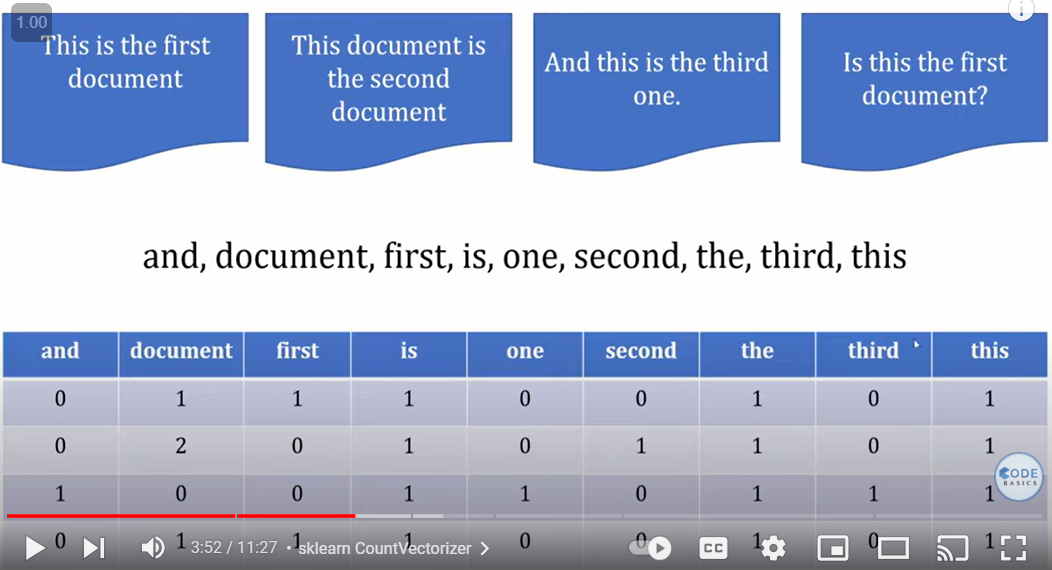

In [47]:
Image('vectorizer.png')

In [48]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(X_tr_count, y_tr)#i can now use this text as my input data because it is technically the same as the text

MultinomialNB()

In [50]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model2.predict(emails_count) #first is not spam, second is spam

array([0, 1], dtype=int64)

In [53]:
#predicting well
X_te_count = v.transform(X_te)
model2.score(X_te_count, y_te)

0.9820531227566404

In [54]:
#Pipelinejust combines multiple lines of ML code into a single line like a function to use
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])
clf.fit(X_tr, y_tr)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [55]:
clf.score(X_te, y_te)

0.9820531227566404

In [59]:
from sklearn.datasets import load_wine

In [61]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [65]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [67]:
df3 = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df3['target'] = wine.target
df3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [68]:
X_tn, X_tt, y_tn, y_tt = train_test_split(wine.data, wine.target, test_size=0.2)

In [69]:
model3 = GaussianNB() #Gaussian works pretty well
model3.fit(X_tn, y_tn)

GaussianNB()

In [70]:
model3.score(X_tt, y_tt)

0.9722222222222222